In [4]:
from skimage import io

In [9]:
import numpy
import matplotlib.pyplot as plt
from pyXSteam.XSteam import XSteam
steamTable = XSteam(XSteam.UNIT_SYSTEM_MKS)

### Cálculo de un ciclo de una etapa condiciones Cerro Prieto

(<matplotlib.image.AxesImage at 0x111d49e10>,
 <matplotlib.image.AxesImage at 0x111d72090>)

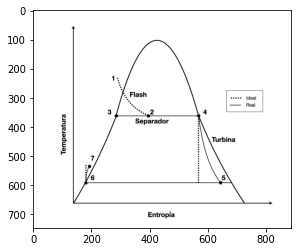

In [13]:
image=io.imread("001.jpeg")/255.0
plt.imshow(image,vmin=0,vmax=1)

In [4]:
T1 = 250 #ºC
P1 = 6.5 #bar
P2 = P1
P3 = P2
P4 = P3
Flujo_mas1 = 420 #kg/s
P5 = 0.115 #bar